In [1]:
# Titanic Survival Prediction - EDA + ML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset directly from Seaborn (preloaded Titanic dataset)
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Basic info
df.info()

# Drop useless columns (like deck, embark_town, etc.)
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'adult_male', 'who', 'alone'], axis=1)

# Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embarked'] = df['embarked'].astype(str)
df['sex'] = df['sex'].astype(str)

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


C:\Users\Atharva\AppData\Local\Temp\ipykernel_29044\1765720401.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Atharva\AppData\Local\Temp\ipykernel_29044\1765720401.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

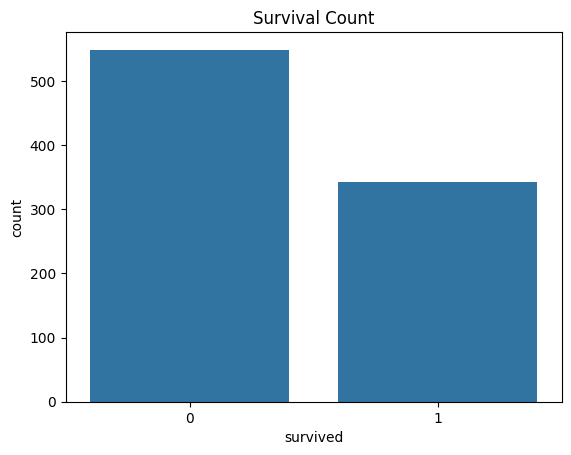

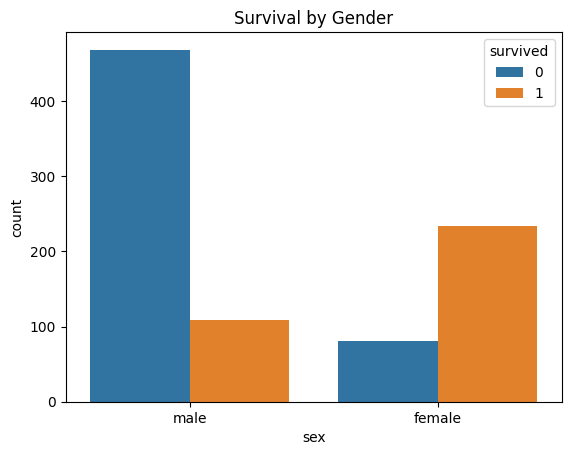

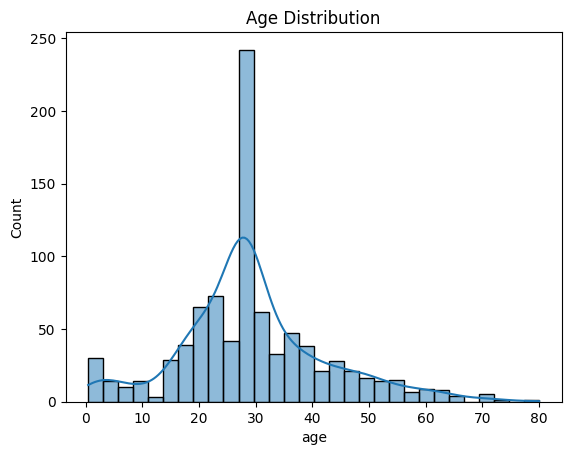

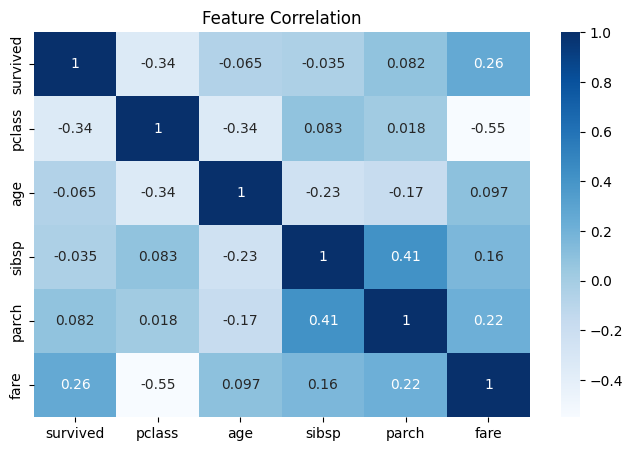

In [3]:
# Count of survivors
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Age distribution
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Feature Correlation')
plt.show()


In [4]:
# Convert categorical to numeric
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Define features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.810
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



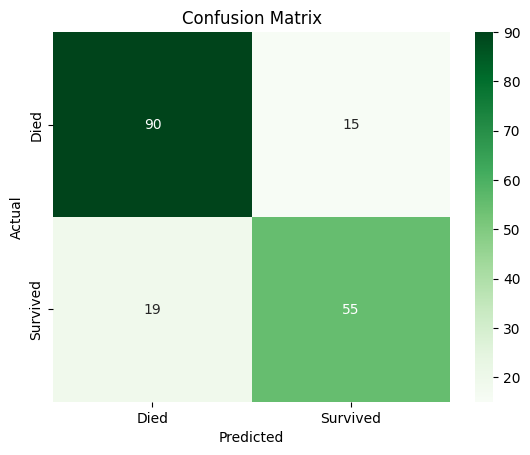

In [5]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Died','Survived'], yticklabels=['Died','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
# Save the cleaned dataset and accuracy to files (optional)
df.to_csv('titanic_cleaned.csv', index=False)
with open('model_accuracy.txt', 'w') as f:
    f.write(f"Model Accuracy: {acc:.3f}")
print("Saved cleaned dataset and model accuracy.")

Saved cleaned dataset and model accuracy.


In [7]:
print("✅ Titanic EDA + ML complete!")
print(f"Final Accuracy: {acc:.3f}")
print("Generated insights: gender has strongest influence on survival.")

✅ Titanic EDA + ML complete!
Final Accuracy: 0.810
Generated insights: gender has strongest influence on survival.
